# Assignment 2 - Classification 

Deniz Jafari


The purpose of this assignment is to train, validate, and tune multiple classifiers that can predict, given a set of observations about a person, which income bracket the person fall into.

In [1]:
# import needed modules 
import pandas as pd
from pandas import DataFrame
import string
import numpy as np
from numpy import mean  
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time 
import scipy.stats as stats
import operator
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import preprocessing

#!brew install gcc@5
#!pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns


/Users/denizjafari/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Reading data 

In [2]:
# Reading the train and test data into dataframes
trainDF = pd.read_csv('income-training.csv')
testDF = pd.read_csv('income-testing.csv')

General info of imported data

##### Training data

In [3]:
trainDF.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [4]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 15 columns):
Age              24421 non-null int64
WorkClass        23037 non-null object
FinalWeight      24421 non-null int64
Education        24421 non-null object
EducationLvl     24421 non-null int64
MaritalStatus    24421 non-null object
Occupation       23031 non-null object
Relationship     24421 non-null object
Race             24421 non-null object
Sex              24421 non-null object
CapitalGain      24421 non-null int64
CapitalLoss      24421 non-null int64
HoursPerWeek     24421 non-null int64
NativeCountry    24026 non-null object
IncomeBracket    24421 non-null object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB


In [5]:
trainDF.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,24421.000000,2.442100e+04,24421.000000,24421.000000,24421.00000,24421.000000
mean,38.635273,1.908781e+05,10.100078,1073.734900,90.72581,40.495352
std,13.658678,1.066108e+05,2.579953,7372.250508,410.42682,12.363606
min,17.000000,1.349200e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.182590e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.394090e+05,13.000000,0.000000,0.00000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.00000,99.000000


##### Testing data

In [6]:
testDF.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


In [7]:
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null object
EducationLvl     12211 non-null int64
MaritalStatus    12211 non-null object
Occupation       11521 non-null object
Relationship     12211 non-null object
Race             12211 non-null object
Sex              12211 non-null object
CapitalGain      12211 non-null int64
CapitalLoss      12211 non-null int64
HoursPerWeek     12211 non-null int64
NativeCountry    11986 non-null object
IncomeBracket    12211 non-null object
dtypes: int64(6), object(9)
memory usage: 1.4+ MB


In [8]:
testDF.describe()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek
count,12211.000000,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000
mean,38.856031,1.873615e+05,10.110228,1203.788961,88.256162,40.497994
std,13.705457,1.046019e+05,2.533795,8057.146114,404.810323,12.283195
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.162960e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.769000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.345370e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning, Exploratory Analysis, & Feature Selection 

The following sections are very interconnected and thus are done without any specific order

#### Data Cleaning
The goals of this section are:
1. Handle missing values and justify the approach taken 
2. Answer the question: why the values are missing and how the above taken approach might impact the overal analysis 
3. Convert the categorical data to numerical via encoding method, justify the method used.

#### Exploratory Analysis
The goals of this section are:
Present 3 trends, answer the question: how could these trends be used to help with the task of classifying income brackets?
Visualize the order of feature importance, answer the question: which of the original attributes in the data are most relevant to an individual's income bracket?

#### Feature Selection 

The purpose of this section is to:
1. Create at least one additional feature that was not originally part of the dataset. Answer the question: How feature engineering is useful in ML? 
2. Select the features for ML analysis and justify the selection. Use feature selection algorithm. 

##### Removing Duplications 
The very firt task is to remove the duplicate data out of the dataset 

In [9]:
trainDF.drop_duplicates(keep = 'first', inplace = True)
testDF.drop_duplicates(keep = 'first', inplace = True)

## Some Trends 

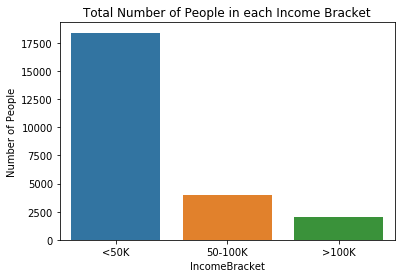

In [10]:
# First lets see how sample observations are distributed among three income bracket categories
sns.countplot(x='IncomeBracket',data=trainDF)
# set axes labels and title
plt.ylabel('Number of People')
plt.title('Total Number of People in each Income Bracket')
plt.show()

The above plot shows that most people in our dataset fall in the <50K income bracket. Also, as the income level goes up, the number of people/observations decrease.  
This shows that the class with >100K is a very small class with much less examples and training data when implementing classifiers, thus, it is anticipated for this class to have the highest error. The middle class will also have higher error than the <50K class.

#### Gender vs Income Bracket

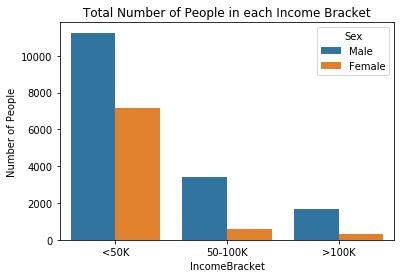

In [11]:
sns.countplot(x='IncomeBracket', hue='Sex', data=trainDF)
# set axes labels and title
plt.ylabel('Number of People')
plt.title('Total Number of People in each Income Bracket')
plt.show()

In the above graph, we can see that ratio of females in the <50k bracket is higher than the other two when compared to males. 

In [12]:
# total number of males and females in each of the categories 
income_gender_bracket = trainDF.groupby(['IncomeBracket','Sex']).size()
print (trainDF['Sex'].describe())
print(income_gender_bracket)

count     24410
unique        2
top        Male
freq      16352
Name: Sex, dtype: object
IncomeBracket  Sex   
50-100K        Female      581
               Male       3413
<50K           Female     7172
               Male      11250
>100K          Female      305
               Male       1689
dtype: int64


Here we see that total number of females in the dataset is actually much less than half of data on males. Less data on females may lead to higher error in lassifying females in higher income brackets than males. 

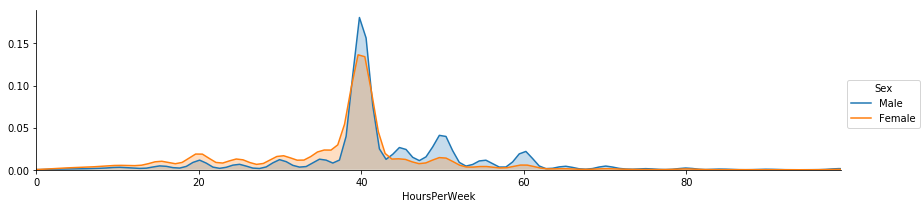

In [13]:
facet = sns.FacetGrid(trainDF, hue="Sex",aspect=4)
facet.map(sns.kdeplot,'HoursPerWeek',shade= True)
facet.set(xlim=(0, trainDF['HoursPerWeek'].max()))
facet.add_legend()
plt.show()

In the above graph we see than the peak of hours of work per week for both males and females is 40 hrs/week, which is the standard. However, there are more males compared to females that work for longer hours in a week and more females than males that work less than 40 hours per week. Below we will see whether there is any difference between the average number of hours of work per week between the two genders among different occupation categories. 

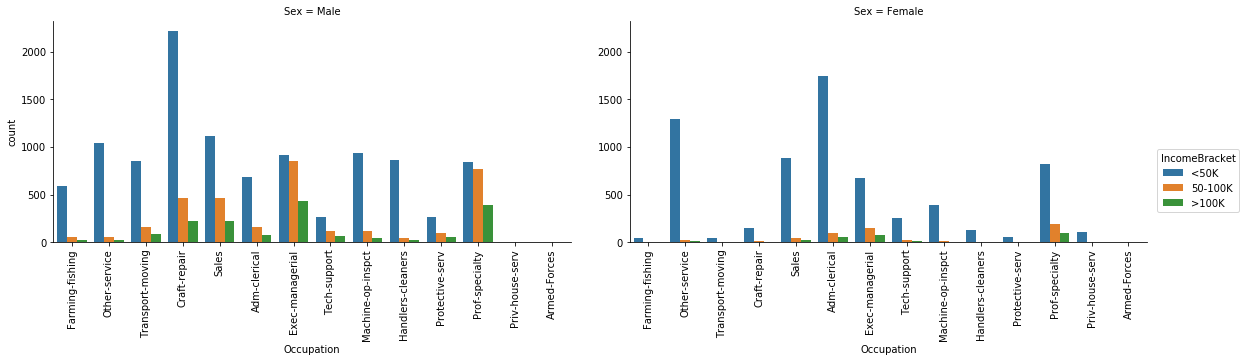

In [14]:
g = sns.factorplot(x="Occupation", hue='IncomeBracket', col="Sex",
                   data=trainDF, kind="count",
                    size=4, aspect=2, estimator=mean)
g.set_xticklabels(rotation=90)
plt.show()

Factorplot with mean estimator takes into account that there are less data on females. The major differences between two genders are in specific occupation categories of Farming/fishing, Transportation, and Craft/Repairs, where males seem to be dominating. I expect these classes to be more important that the rest with this feature not playing an important role. Furhtermore, there is better dist. of data in the male category of Exec and Prof and these two would more likely play a role in determining income brackets. 

#### Age vs Income Bracket

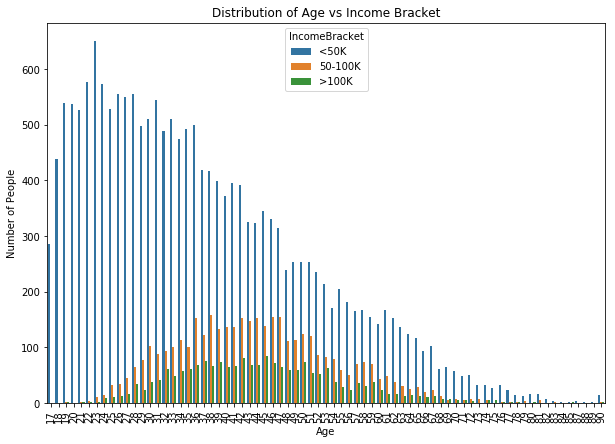

In [15]:
# Age dist. in 3 income levels
ax, figure = plt.subplots(figsize=(10,7))
sns.countplot(x='Age',hue='IncomeBracket',  data=trainDF)
# set axes labels and title
plt.xticks( rotation = 90)
plt.ylabel('Number of People')
plt.title('Distribution of Age vs Income Bracket')
plt.show()

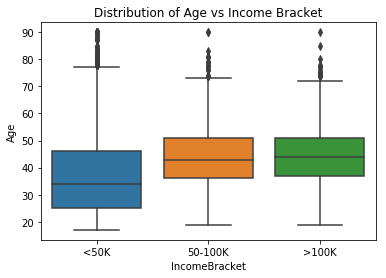

In [16]:
sns.boxplot(x='IncomeBracket', y='Age', data=trainDF)
plt.title('Distribution of Age vs Income Bracket')
plt.show()

From the above plots we see that the people in the lowest income bracket are much younger, and people in the highest income bracket are only slightly older than the middle braket on average. There is a clear differences beteen the classes and we expect this feature to play an important role in classification.

#### Capital Gain vs Income Bracket

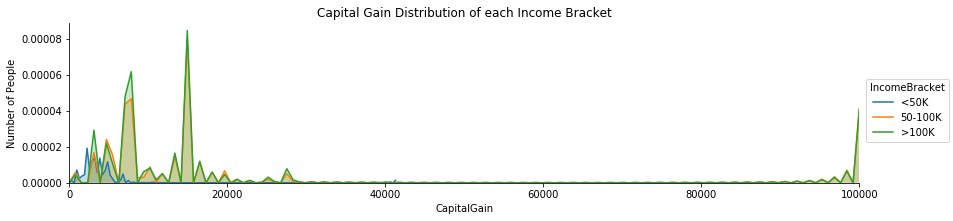

In [17]:
facet = sns.FacetGrid(trainDF, hue="IncomeBracket",aspect=4)
facet.map(sns.kdeplot,'CapitalGain',shade= True)
facet.set(xlim=(0, trainDF['CapitalGain'].max()))
facet.add_legend()
plt.ylabel('Number of People')
plt.title('Capital Gain Distribution of each Income Bracket')
plt.show()

This plot shows the gain of income by selling assets. In this graph, we see clear differences among classes, and thus can say that this feature is going to be important in determining various classes. 
<50K class has less than 15k in capital gain 
while 50-100K has less than 35k in capital gain 
and 100< has the most capital gain 

#### Education Trends

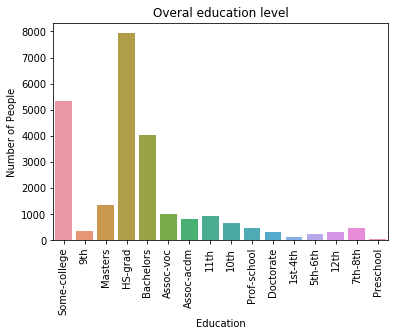

In [18]:
sns.countplot(x='Education',  data=trainDF)
# set axes labels and title
plt.xticks( rotation = 90)
plt.ylabel('Number of People')
plt.title('Overal education level')
plt.show()

Here we see that the majority of people fall into high school grad, followed by some collage education, and then having bachelor degree. 

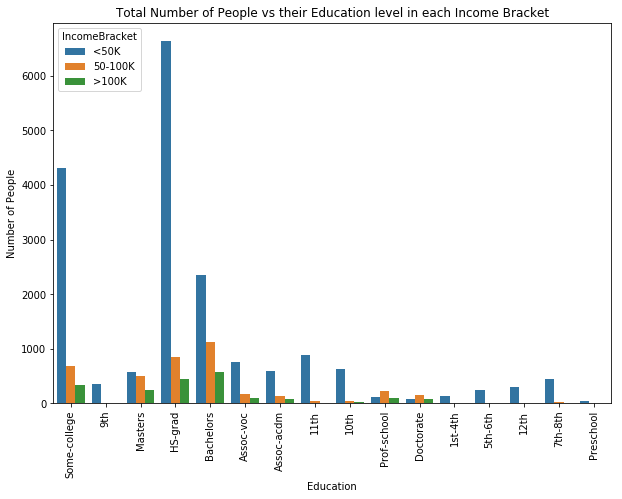

In [19]:
ax, figure = plt.subplots(figsize=(10,7))
sns.countplot(x='Education', hue='IncomeBracket', data=trainDF)
# set axes labels and title
plt.ylabel('Number of People')
plt.xticks( rotation = 90)
plt.title('Total Number of People vs their Education level in each Income Bracket')
plt.show()

Here shows that at the extreme of the education levels, doctorate vs elementary school level, majority will either be in >100k level (doctorate), or <50k (elementary level education). This feature is important for the highest and lowest education level for determining the correct category. 

## Handling missing data

Let's we look at the dataset to see which columns have missing data in them. 

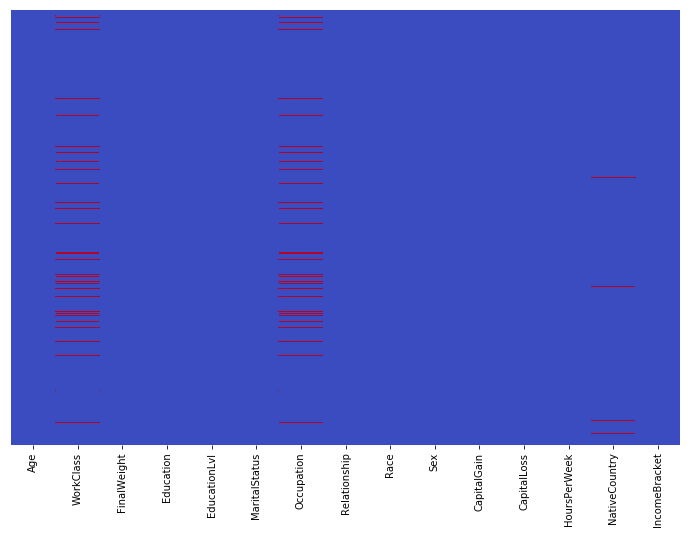

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(trainDF.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
plt.show()

The above graph visualizes that there are three columns with missing data in them, namely, WorkClass, Occupation, and NativeCountry. Furhtermore, the heat map shows that the data entries with missing Occupation and WorkClass are very similar. In fact, below we see that there are only 6 entries that have Work class, but not the occupation, and the rest of the data miss both enteries.    
Similarly the missing data for the test data is visualized and can be shown that same features are missing data.

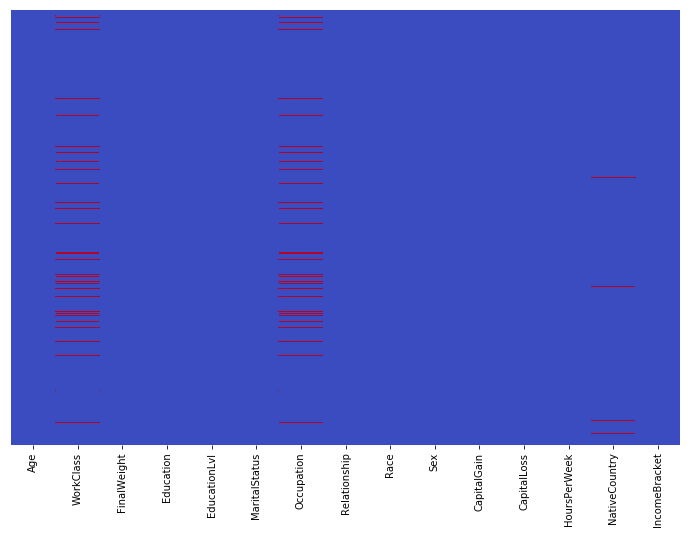

In [21]:
# here we see that the test data also is missing values for the same features 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(trainDF.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
plt.show()

Some of the reasons these features are missing data might be because the Ocuupation/Work Class wasn't in the list and people just didn't fill in these categories when filling surveys. Some people might be from States and just didnt fill the native country or maybe their native country wasn't an option to choose from. 

Let's look at the rows of the data with missing information.

In [22]:
print("Data enteries total count for missing Occupation entry")
print(trainDF.loc[trainDF.Occupation.isnull()].count())
print("Data enteries total count for missing WorkClass entry")
print(trainDF.loc[trainDF.WorkClass.isnull()].count())

Data enteries total count for missing Occupation entry
Age              1389
WorkClass           6
FinalWeight      1389
Education        1389
EducationLvl     1389
MaritalStatus    1389
Occupation          0
Relationship     1389
Race             1389
Sex              1389
CapitalGain      1389
CapitalLoss      1389
HoursPerWeek     1389
NativeCountry    1371
IncomeBracket    1389
dtype: int64
Data enteries total count for missing WorkClass entry
Age              1383
WorkClass           0
FinalWeight      1383
Education        1383
EducationLvl     1383
MaritalStatus    1383
Occupation          0
Relationship     1383
Race             1383
Sex              1383
CapitalGain      1383
CapitalLoss      1383
HoursPerWeek     1383
NativeCountry    1365
IncomeBracket    1383
dtype: int64


In [23]:
trainDF.loc[(trainDF.Occupation.isnull()) & (trainDF.WorkClass.notnull())]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
967,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<50K
5364,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<50K
12944,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<50K
13116,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<50K
21769,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<50K
22910,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<50K


In [24]:
testDF.loc[(testDF.Occupation.isnull()) & (testDF.WorkClass.notnull())]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
6035,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<50K
11455,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<50K


From the rows that miss the occupation, but have the work class, we see that the reason these individuals are missing the occupation is the fact that they don't have any oocupation to enter. In fact, the occupation has no category of unemployed. Since these individuals never worked, we will add a category to the occupation and call it unemployed

In [25]:
trainDF.loc[(trainDF.Occupation.isnull()) & (trainDF.WorkClass.notnull()), 'Occupation'] = 'Unemployed'
testDF.loc[(testDF.Occupation.isnull()) & (testDF.WorkClass.notnull()), 'Occupation'] = 'Unemployed'

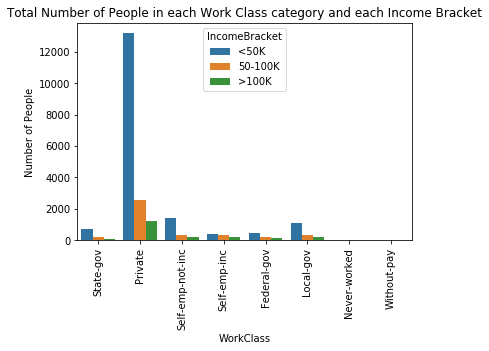

In [26]:
# explore the Workclass of dataset 
sns.countplot(x='WorkClass', hue='IncomeBracket', data=trainDF)
# set axes labels and title
plt.ylabel('Number of People')
plt.xticks( rotation = 90)
plt.title('Total Number of People in each Work Class category and each Income Bracket')
plt.show()

In the above plot we see that the majority of data fall into the private category, thus, for the missing data the probability that they fall into private category is the highest and therefore I picked this category for the rest of missing data.  

In [27]:
trainDF.loc[trainDF.WorkClass.isnull(), 'WorkClass'] = 'Private'
testDF.loc[testDF.WorkClass.isnull(), 'WorkClass'] = 'Private'
# verify 
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24410 entries, 0 to 24420
Data columns (total 15 columns):
Age              24410 non-null int64
WorkClass        24410 non-null object
FinalWeight      24410 non-null int64
Education        24410 non-null object
EducationLvl     24410 non-null int64
MaritalStatus    24410 non-null object
Occupation       23027 non-null object
Relationship     24410 non-null object
Race             24410 non-null object
Sex              24410 non-null object
CapitalGain      24410 non-null int64
CapitalLoss      24410 non-null int64
HoursPerWeek     24410 non-null int64
NativeCountry    24015 non-null object
IncomeBracket    24410 non-null object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


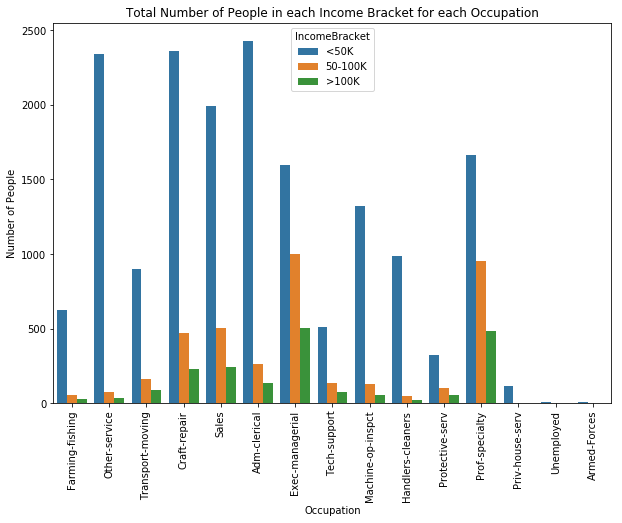

In [28]:
# lets see distribution of occupation
ax, figure = plt.subplots(figsize=(10,7))
sns.countplot(x='Occupation',hue='IncomeBracket',data=trainDF)
# set axes labels and title
plt.ylabel('Number of People')
plt.title('Total Number of People in each Income Bracket for each Occupation')
plt.xticks( rotation = 90)
plt.show()

Here we see that almost all occupations have all three income level except for Private house services and armed forces. All occupation categories have more peole within <50k income bracket than other two levels. The executive management and specialty professor categories have the highest number of people that fall within the two higher income brackets. Furthermore, the top three categories with the most number of people in them are Admin services, craft repair, and other services. 
Next we see whether there is any difference between gender and income bracket, rational being
that as the occupation category becomes more specialty, the education level is higher. 

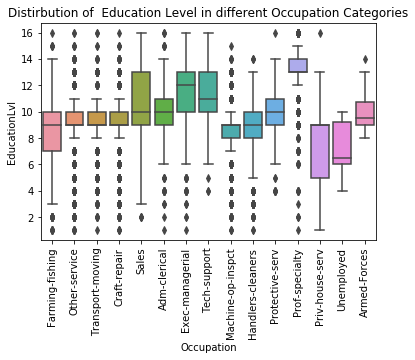

In [29]:
# lets explore the relationship between occupation and the education level
plt.title('Distirbution of  Education Level in different Occupation Categories')
plt.xticks(rotation=90)
sns.boxplot(x="Occupation", y="EducationLvl", data=trainDF)
plt.show()

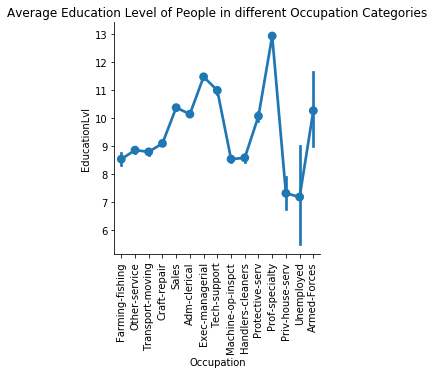

In [30]:
sns.factorplot(x="Occupation", y='EducationLvl', data=trainDF, estimator=mean)
plt.title('Average Education Level of People in different Occupation Categories')
plt.xticks(rotation=90)
plt.show()

From the above plots, we see that education level matters for some occupation categories. For example prof-specialty has the highest value for its mean in the education level, therefore, some of the missing data can be categories based on their education level as followed. As the number of managers is more than the tech support we place all the missing data in education level 12 and 11 into managerial position although both occupations have close means with mean education level of tech support being close to 11 as well. Since sales has alot of observations with mean education level 10, we replace the missing data with education level 10 to sales, replace missing of 9 to clerks, <7 to priv-services, and drop the rest. 
The goal here was to keep as many observations as possible, in order to have more data to train the models with. Although these classes might not be as significant of other classes in education level in determining income bracket, assigning numbers to them allows us to preserve the information. The implication of replacing one variable based on another one however, is that this may result in increasing the corrolation that exist between occupation and education level variables. 

In [31]:
trainDF.loc[(trainDF.EducationLvl >= 13)&(trainDF.Occupation.isnull()) , 'Occupation'] = 'Prof-specialty'
trainDF.loc[(trainDF.EducationLvl == 12)&(trainDF.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
trainDF.loc[(trainDF.EducationLvl == 11)&(trainDF.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
trainDF.loc[(trainDF.EducationLvl == 10)&(trainDF.Occupation.isnull()) , 'Occupation'] = 'Sales'
trainDF.loc[(trainDF.EducationLvl == 9)&(trainDF.Occupation.isnull()) , 'Occupation'] = 'Adm-clerical'
trainDF.loc[(trainDF.EducationLvl < 7)&(trainDF.Occupation.isnull()) , 'Occupation'] = 'Priv-house-serv'

testDF.loc[(testDF.EducationLvl >= 13)&(testDF.Occupation.isnull()) , 'Occupation'] = 'Prof-specialty'
testDF.loc[(testDF.EducationLvl == 12)&(testDF.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
testDF.loc[(testDF.EducationLvl == 11)&(testDF.Occupation.isnull()) , 'Occupation'] = 'Exec-managerial'
testDF.loc[(testDF.EducationLvl == 10)&(testDF.Occupation.isnull()) , 'Occupation'] = 'Sales'
testDF.loc[(testDF.EducationLvl == 9)&(testDF.Occupation.isnull()) , 'Occupation'] = 'Adm-clerical'
testDF.loc[(testDF.EducationLvl < 7)&(testDF.Occupation.isnull()) , 'Occupation'] = 'Priv-house-serv'
#other occupation categories have close to one another means, are small subset and we can't
# guess with any good accuracy thus we drop the data 
#set the missing values of the Occupation column 
trainDF.dropna(subset=['Occupation'],inplace = True) 
testDF.dropna(subset=['Occupation'],inplace = True) 
# verify by observing increase in the total count of Occupation  
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24303 entries, 0 to 24420
Data columns (total 15 columns):
Age              24303 non-null int64
WorkClass        24303 non-null object
FinalWeight      24303 non-null int64
Education        24303 non-null object
EducationLvl     24303 non-null int64
MaritalStatus    24303 non-null object
Occupation       24303 non-null object
Relationship     24303 non-null object
Race             24303 non-null object
Sex              24303 non-null object
CapitalGain      24303 non-null int64
CapitalLoss      24303 non-null int64
HoursPerWeek     24303 non-null int64
NativeCountry    23908 non-null object
IncomeBracket    24303 non-null object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


the top category is United-States, with total entries of 95.5%


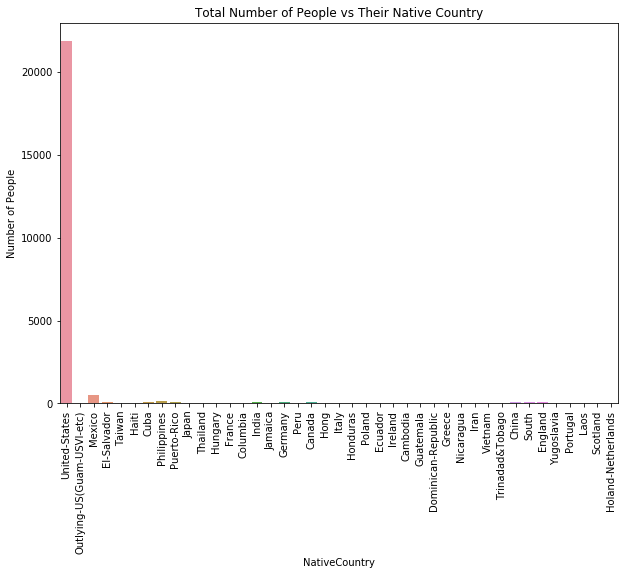

In [32]:
# Lets see what is the distribution of the native country in the dataset 
native= trainDF['NativeCountry'].describe()
print('the top category is {}, with total entries of {}%'.format(native.top, round((native.freq/22898)*100,1)))
ax, figure = plt.subplots(figsize=(10,7))
sns.countplot(x='NativeCountry', data=trainDF)
# set axes labels and title
plt.ylabel('Number of People')
plt.xticks( rotation = 90)
plt.title('Total Number of People vs Their Native Country')
plt.show()

In the above plot we see that more than 90% of entries have USA as their Native country. Thus, we convert the missing data to defult of US.

In [33]:
# Set the defult NativeCountry of the missing data to United-States 
trainDF.loc[trainDF.NativeCountry.isnull() , 'NativeCountry'] = 'United-States'
testDF.loc[testDF.NativeCountry.isnull() , 'NativeCountry'] = 'United-States'

Let's see if there is any difference between the information provided between the Education and EducationLvl columns. 

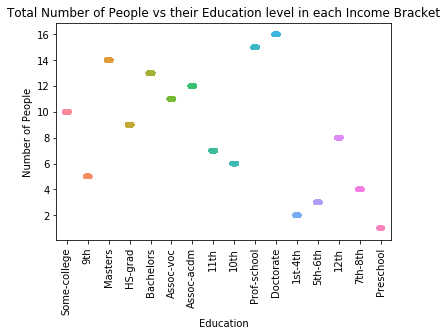

In [34]:
sns.stripplot(x="Education", y="EducationLvl", data=trainDF, jitter=True)
plt.ylabel('Number of People')
plt.xticks( rotation = 90)
plt.title('Total Number of People vs their Education level in each Income Bracket')
plt.show()

From the above plot we see that the information provided in two columns are redundat, in fact the EducationLvl is just numerical values of the Education level of the individual. Since the algorithms only work with numerical values and not string entries, we can drop Education column and keep EducationLvl only with no loss of data. 

In [35]:
trainDF = trainDF.drop(['Education'], axis=1)
testDF = testDF.drop(['Education'], axis=1)

### Converting the categorical data to numerical

Categorical variables needs to be converted into numerical values since scikit-learn only takes numerical values as input in a numpy array. We can do this by encoding the categorical values with dummy variables. This method uses one-hot-coding such that each category for each feature becomes a new column. A category's column will get a value of 1 if the original feature belonged to that category. Only one of the categorical feature columns can have of 1. One-hot-coding is much better than just giving numerical values as it prevents ordinal interpretation by the algorithms used. The draw back is the number of columns increases and the data is stored as large sparse martix.  

In [36]:
dummies_WorkClass_train = pd.get_dummies(trainDF['WorkClass'], prefix='WorkClass')
dummies_MaritalStatus_train = pd.get_dummies(trainDF['MaritalStatus'], prefix='MaritalStatus')
dummies_Occupation_train = pd.get_dummies(trainDF['Occupation'], prefix='Occupation')
dummies_Relationship_train = pd.get_dummies(trainDF['Relationship'], prefix='Relationship')
dummies_Race_train = pd.get_dummies(trainDF['Race'], prefix='Race')
dummies_Sex_train = pd.get_dummies(trainDF['Sex'], prefix='Sex')
dummies_NativeCountry_train = pd.get_dummies(trainDF['NativeCountry'], prefix='NativeCountry')

# Add the new features to the dataframe via concating
tempDF = pd.concat([trainDF, dummies_WorkClass_train, dummies_MaritalStatus_train,
                    dummies_Occupation_train, dummies_Relationship_train,
                   dummies_Race_train, dummies_Sex_train, dummies_NativeCountry_train], axis=1)

# Drop the original categorical feature columns
tempDF = tempDF.drop(['WorkClass','MaritalStatus','Occupation','Relationship',
                     'Race', 'Sex', 'NativeCountry'],axis=1)

# Drop one of each of the dummy variables because its value is implied
X_train = tempDF.drop(['WorkClass_Never-worked','MaritalStatus_Never-married',
                       'Occupation_Unemployed','Relationship_Other-relative',
                        'Race_Other', 'Sex_Male', 'NativeCountry_Cuba'],axis=1)

X_train.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
0,42,179151,10,0,0,40,<50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28,68021,10,0,0,30,<50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,24,233499,10,0,0,40,50-100K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,32,168782,5,0,0,32,<50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,55,105582,14,2228,0,50,<50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Baseline performance

Run one of the algorithms (Logistic Regression here) on all of the data without any feature engineering to ensure that the added features are actually working in improving the results. I chose logistic regression, a common classifier algorithm, for baseline performance 

##### Rescalling values 
Having features that have different scales can cause problems in some machine learning models since a lot of the models are based on the concept of Euclidean Distances. This means that features with greater scales would have a greater impact on the solution than those of smaller values. We can rectify this situation by scaling the independent values. This can be done with the scaler function.

In [37]:
scaler = StandardScaler()
X_all = X_train.drop(['IncomeBracket'], axis=1)
X_all = scaler.fit_transform(X_all)

dic = {'<50K': 0, '50-100K':1, '>100K':2}
trainDF['IncomeBracket'] = trainDF['IncomeBracket'].map(dic)
testDF['IncomeBracket'] = testDF['IncomeBracket'].map(dic)
y = trainDF.IncomeBracket


##### Evaluation: Cross Validation

When building a model, we want one that can generalize (low bias), and have similar accuracies across testing sets (low variance). Cross-validation partitions the training set into various training and testing sets and we use these sets to train and test the model multiple times. KFold Cross Validation is a common method where the training set is split into k equal sizes. Then of the k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. This results in each sample being tested once. At the end of this we get 10 accuracies for the model and, from this, we can get the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance, thus, representing the true performance of the model on the training set.

In [38]:
def kfold_model_run(model, X, y, K=10):
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    accuracy = np.zeros(K)
    np_idx = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        ACC = accuracy_score(y_test, predictions)
        accuracy[np_idx] = ACC*100
        np_idx += 1

        print ("Fold {}: Accuracy: {}".format(np_idx, round(ACC,3)))   
    #print("Model {}".format(model))
    print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
    return model

In [39]:
# run the logistic regression model with all  the features included
start_time = time.time()
lg = LogisticRegression()
kfold_model_run(lg, X_all, y)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {}'.format(elapsedtime))
print('Total number of features are: {}'.format(X_all.shape[1]))

Fold 1: Accuracy: 0.802
Fold 2: Accuracy: 0.796
Fold 3: Accuracy: 0.802
Fold 4: Accuracy: 0.812
Fold 5: Accuracy: 0.807
Fold 6: Accuracy: 0.8
Fold 7: Accuracy: 0.797
Fold 8: Accuracy: 0.794
Fold 9: Accuracy: 0.805
Fold 10: Accuracy: 0.794
Average Score: 80.085%(0.555%)
Time taken to run this model is 29.461998224258423
Total number of features are: 83


The above about 80% is our baseline accuracy. 
When a feature has a lot of categories, a lot of new columns are generated. Not all columns however are significant, thus we can eliminate some of the columns. For example, more than 90% have USA as their native country, and the very small amount of data are scattered into large category of other countries. We eliminate many columns by only keeping the dummy variable that provides yes or no for USA as native country and eleminate the rest for the Native Country feature. 

### Feature Selection

In [40]:
trainDF.loc[trainDF['NativeCountry'] != 'United-States', 'NativeCountry'] = 'Other'
testDF.loc[testDF['NativeCountry'] != 'United-States', 'NativeCountry'] = 'Other'

By looking at the feature definitions, we see a lot of common information in Relationship and MaritalStatus. Since both are categorical variables, we perform chi-square test on them to see if the variables have any dependance in one another. 

In [41]:
relations = pd.crosstab(trainDF['Relationship'],trainDF['MaritalStatus'])
chi, p, dof, expected = stats.chi2_contingency(relations)
print('p-value is {}, and Chi-squared value is {}'.format(p,chi))

p-value is 0.0, and Chi-squared value is 28833.71605564572


from above we conclude that the association between the two features is strong. In order to reduce columns we convert the categories in MaritalStatus in either single, married, or married-spouse-absent. Since these two valiables share similar info and are dependant, we can select one for modeling and eliminate the other. This I did after I obtain my most important features from the gradient boost search of most important features. 

In [42]:
trainDF['MaritalStatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married',inplace= True)
trainDF['MaritalStatus'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Single',inplace= True)

testDF['MaritalStatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married',inplace= True)
testDF['MaritalStatus'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Single',inplace= True)
trainDF.groupby(['Relationship',"MaritalStatus"]).count()

Age  WorkClass  FinalWeight  \
Relationship   MaritalStatus                                         
Husband        Married                9904       9904         9904   
Not-in-family  Married                  10         10           10   
               Married-spouse-absent   145        145          145   
               Single                 6100       6100         6100   
Other-relative Married                 101        101          101   
               Married-spouse-absent    27         27           27   
               Single                  601        601          601   
Own-child      Married                  81         81           81   
               Married-spouse-absent    32         32           32   
               Single                 3586       3586         3586   
Unmarried      Married-spouse-absent    99         99           99   
               Single                 2438       2438         2438   
Wife           Married                1179       1179         1179   

                                      EducationLvl  Occupation  Race   Sex  \
Relationship   MaritalStatus                                                 
Husband        Married                        9904        9904  9904  9904   
Not-in-family  Married                          10          10    10    10   
               Married-spouse-absent           145         145   145   145   
               Single                         6100        6100  6100  6100   
Other-relative Married                         101         101   101   101   
               Married-spouse-absent            27          27    27    27   
               Single                          601         601   601   601   
Own-child      Married                          81          81    81    81   
               Married-spouse-absent            32          32    32    32   
               Single                         3586        3586  3586  3586   
Unmarried      Married-spouse-absent            99          99    99    99   
               Single                         2438        2438  2438  2438   
Wife           Married                        1179        1179  1179  1179   

                                      CapitalGain  CapitalLoss  HoursPerWeek  \
Relationship   MaritalStatus                                                   
Husband        Married                       9904         9904          9904   
Not-in-family  Married                         10           10            10   
               Married-spouse-absent          145          145           145   
               Single                        6100         6100          6100   
Other-relative Married                        101          101           101   
               Married-spouse-absent           27           27            27   
               Single                         601          601           601   
Own-child      Married                         81           81            81   
               Married-spouse-absent           32           32            32   
               Single                        3586         3586          3586   
Unmarried      Married-spouse-absent           99           99            99   
               Single                        2438         2438          2438   
Wife           Married                       1179         1179          1179   

                                      NativeCountry  IncomeBracket  
Relationship   MaritalStatus                                        
Husband        Married                         9904           9904  
Not-in-family  Married                           10             10  
               Married-spouse-absent            145            145  
               Single                          6100           6100  
Other-relative Married                          101            101  
               Married-spouse-absent             27             27  
               Single                           601            6

From above we see that relationship feature provides similar information, but not quiet the same. Since Husband and wife are guarantteed to be married, moving forward we convert husbad and wife into married, to eliminate a redundant column, as married with sex info would provide us with full info as wife/husband would. 

In [43]:
trainDF['Relationship'].replace(['Husband', 'Wife'], 'Married',inplace= True)
testDF['Relationship'].replace(['Husband', 'Wife'], 'Married',inplace= True)

In [44]:
corr = trainDF.corr()
corr

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,IncomeBracket
Age,1.000000,-0.084831,0.037711,0.075202,0.059309,0.067095,0.214910
FinalWeight,-0.084831,1.000000,-0.040556,-0.005117,0.002361,-0.015507,-0.008348
EducationLvl,0.037711,-0.040556,1.000000,0.131608,0.079196,0.141477,0.310816
CapitalGain,0.075202,-0.005117,0.131608,1.000000,-0.032298,0.089569,0.206374
CapitalLoss,0.059309,0.002361,0.079196,-0.032298,1.000000,0.055415,0.138774
HoursPerWeek,0.067095,-0.015507,0.141477,0.089569,0.055415,1.000000,0.215998
IncomeBracket,0.214910,-0.008348,0.310816,0.206374,0.138774,0.215998,1.000000


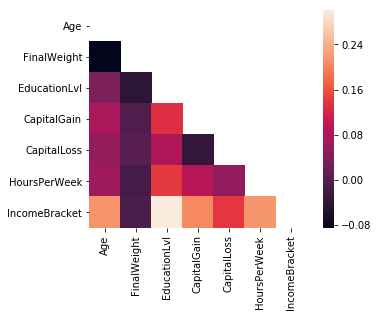

In [45]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True)
plt.show()

From the above corrolation obtained among numerical features after maping the income bracket, we see that the highest corrolation is between the EducationLvl and the income bracket, followed by Age, HoursPerWeek, CapitalGain, and finally Capital Loss. Final Weight seems to have the least corollation to Income Bracket. Furthermore, only numerical features are displayed here, in order to be able to obtain the corrolation of categorical data to target value, we must first convert the variables to numerical using one-hot-coding, so there would be no ordinal assumption made by the algorithms while corrolation and later models are calculated/used. 

#### New Feature
A new feature that is going to be added to the dataset called the Net capital gain, which equals to the individual's capital gain minus that individuals capita loss. This feature allows the information provided in two columns if the data set to be combined in one column. The minus value means the capital loss is higher than capital gain, while the positive value means that the gain of the individual was higher. This allows us to drop the two columns and only keep one column for processing, thus, improving all algorithms' data computation. 

In general feature engineering is useful for taking out the redundant information, thus improving model by making features more indep of one another and by making the computation faster. 

In [46]:
def NetGain(Capital):
    CapitalGain, CapitalLoss = Capital
    Net = CapitalGain - CapitalLoss
    return Net

trainDF['NetCapital'] = trainDF[['CapitalGain', 'CapitalLoss']].apply(NetGain, axis=1)
testDF['NetCapital'] = testDF[['CapitalGain', 'CapitalLoss']].apply(NetGain, axis=1)
trainDF = trainDF.drop(['CapitalGain', 'CapitalLoss'], axis=1)
testDF = testDF.drop(['CapitalGain', 'CapitalLoss'], axis=1)

#### Converting categorical data to numerical after some feature selection 

In [47]:
def makeDfDummy(DF):
    tempDF = pd.get_dummies(DF) 
    # Drop one of each of the dummy variables because its value is implied
    X = tempDF.drop(['WorkClass_Never-worked','Occupation_Unemployed',
                     'Relationship_Other-relative','Race_Other', 'Sex_Male', 
                     'NativeCountry_Other','MaritalStatus_Married-spouse-absent'],axis=1)
    return X

X_train = makeDfDummy(trainDF)
X_test = makeDfDummy(testDF)

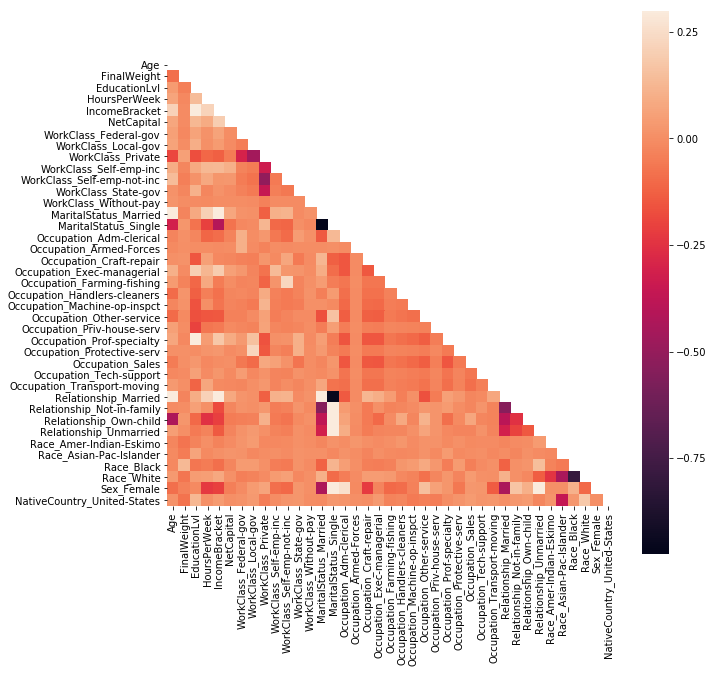

In [48]:
ax, figure = plt.subplots(figsize=(10,10))
corr = X_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True)
plt.show()

In the above corrolation map we see that a lot of features do not have high corrolations to the income bracket, thus, we can eliminate a lot of features. In order to determine which features have the highest impact on the model, I used the important feature detector of the gradient boosting to determine the top features to keep. 

In [49]:
# Seperate X and Y
X_train = X_train.drop(['IncomeBracket'], axis=1)
y_train = trainDF.IncomeBracket

X_test = X_test.drop(['IncomeBracket'], axis=1)
y_test = testDF.IncomeBracket

In [50]:
# store the name of the features in order 
feature_names = X_train.columns

#### Feature Elimination

In [51]:
# scale features 
X_train_scale = scaler.fit_transform(X_train)

In [52]:
# Initilize the model then fit with training data.
g_boost = XGBClassifier()
kfold_model_run(g_boost, X_train_scale, y_train, K=3)

Fold 1: Accuracy: 0.814
Fold 2: Accuracy: 0.818
Fold 3: Accuracy: 0.809
Average Score: 81.332%(0.37%)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

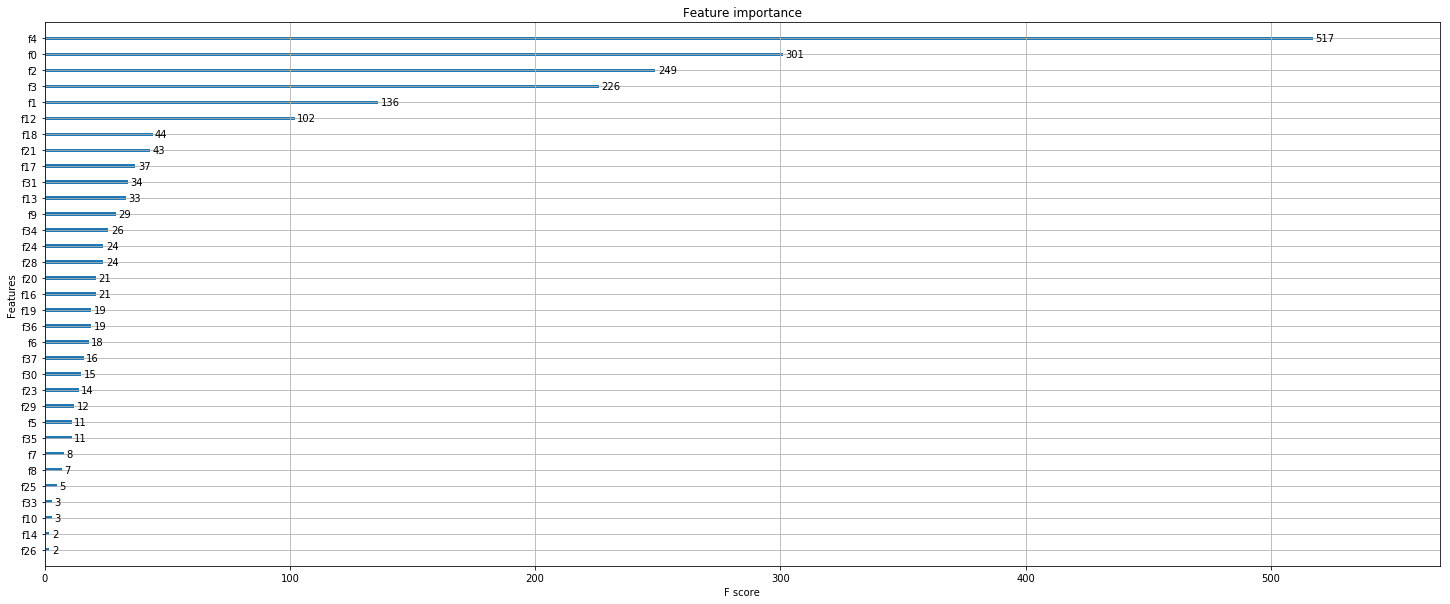

In [53]:
ax = plot_importance(g_boost)
fig = ax.figure
fig.set_size_inches(25, 10)
plt.show()

In [70]:
feature = g_boost.feature_importances_
Dic = dict(zip(feature_names,feature))
print('Top features in order are:')

print(feature_names[4])
print(feature_names[0])
print(feature_names[2])
print(feature_names[3])
print(feature_names[1])
print(feature_names[12])
print(feature_names[18])
print(feature_names[21])
print(feature_names[17])
print(feature_names[9])
print(feature_names[34])
print(feature_names[24])
print(feature_names[28])
print(feature_names[20])
print(feature_names[16])

Top features in order are:
NetCapital
Age
EducationLvl
HoursPerWeek
FinalWeight
MaritalStatus_Married
Occupation_Farming-fishing
Occupation_Other-service
Occupation_Exec-managerial
WorkClass_Self-emp-not-inc
Race_Black
Occupation_Protective-serv
Relationship_Married
Occupation_Machine-op-inspct
Occupation_Craft-repair


In the trend section, we saw clear relation between Capital gain and the target variable as well as age and education level with target variable. Let's see how the model performs with top 10, and then 15 features only. The effects of eliminating features is that model becomes less accurate, as in general adding more features tends to make models more accurate, however, since there are less features, less computation is needed, thus the model runs faster.

In [55]:
print('Slecting top 10 features')
X_train_less = X_train[['NetCapital','Age','EducationLvl','HoursPerWeek','FinalWeight',
                      'Relationship_Married','Occupation_Other-service',
                      'Occupation_Farming-fishing','Occupation_Exec-managerial',
                      'WorkClass_Self-emp-not-inc']]
# scale features 
X_train_scale = scaler.fit_transform(X_train_less)

start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))

print('Slecting top 15 features')
X_train_less = X_train[['NetCapital','Age','EducationLvl','HoursPerWeek','FinalWeight',
                      'Relationship_Married','Occupation_Other-service',
                      'Occupation_Farming-fishing','Occupation_Exec-managerial',
                      'WorkClass_Self-emp-not-inc','WorkClass_Local-gov',
                       'Occupation_Machine-op-inspct','Occupation_Handlers-cleaners',
                      'Race_Black','Occupation_Protective-serv']]
# scale features 
X_train_scale = scaler.fit_transform(X_train_less)

start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))


Slecting top 10 features
Fold 1: Accuracy: 0.794
Fold 2: Accuracy: 0.795
Fold 3: Accuracy: 0.795
Fold 4: Accuracy: 0.809
Fold 5: Accuracy: 0.8
Fold 6: Accuracy: 0.795
Fold 7: Accuracy: 0.787
Fold 8: Accuracy: 0.789
Fold 9: Accuracy: 0.799
Fold 10: Accuracy: 0.789
Average Score: 79.529%(0.613%)
Time taken to run this model is 1.0726861953735352 sec
Slecting top 15 features
Fold 1: Accuracy: 0.794
Fold 2: Accuracy: 0.794
Fold 3: Accuracy: 0.796
Fold 4: Accuracy: 0.813
Fold 5: Accuracy: 0.8
Fold 6: Accuracy: 0.797
Fold 7: Accuracy: 0.79
Fold 8: Accuracy: 0.791
Fold 9: Accuracy: 0.801
Fold 10: Accuracy: 0.789
Average Score: 79.649%(0.654%)
Time taken to run this model is 1.4587981700897217 sec


In [56]:
X_train_less = X_train
i = 0
elim = []
for i in range(len(feature)):
    if feature[i] == 0.0:
        elim.append(X_train_less.columns[i])
        print('Column {} has small Fscore value, thus not important and is eliminated'.format(X_train_less.columns[i]))
X_train_less = X_train_less.drop(elim, axis=1)

X_train_scale = scaler.fit_transform(X_train_less)
start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))


Column WorkClass_Without-pay has small Fscore value, thus not important and is eliminated
Column Occupation_Armed-Forces has small Fscore value, thus not important and is eliminated
Column Occupation_Priv-house-serv has small Fscore value, thus not important and is eliminated
Column Occupation_Transport-moving has small Fscore value, thus not important and is eliminated
Column Race_Amer-Indian-Eskimo has small Fscore value, thus not important and is eliminated
Fold 1: Accuracy: 0.792
Fold 2: Accuracy: 0.796
Fold 3: Accuracy: 0.798
Fold 4: Accuracy: 0.809
Fold 5: Accuracy: 0.799
Fold 6: Accuracy: 0.799
Fold 7: Accuracy: 0.795
Fold 8: Accuracy: 0.789
Fold 9: Accuracy: 0.802
Fold 10: Accuracy: 0.79
Average Score: 79.682%(0.562%)
Time taken to run this model is 8.068639039993286 sec


In the above only the features with 0 Fscore were removed. The model accuracy has drop slightly, and variance has increased tiny bit, but the model runs more than two times faster.

In [57]:
X_train_less = X_train

i = 0
elim = []
for i in range(len(feature)):
    if feature[i] <= 0.007:
        elim.append(X_train_less.columns[i])
        print()
        print('Column {} has small Fscore value, thus not important and is eliminated'.format(X_train_less.columns[i]))
X_train_less = X_train_less.drop(elim, axis=1)

X_train_scale = scaler.fit_transform(X_train_less)
start_time = time.time()
kfold_model_run(lg, X_train_scale, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))
print('Total number of features kept are: {}'.format(X_train_less.columns.size))


Column WorkClass_Federal-gov has small Fscore value, thus not important and is eliminated

Column WorkClass_Private has small Fscore value, thus not important and is eliminated

Column WorkClass_Self-emp-inc has small Fscore value, thus not important and is eliminated

Column WorkClass_State-gov has small Fscore value, thus not important and is eliminated

Column WorkClass_Without-pay has small Fscore value, thus not important and is eliminated

Column Occupation_Adm-clerical has small Fscore value, thus not important and is eliminated

Column Occupation_Armed-Forces has small Fscore value, thus not important and is eliminated

Column Occupation_Priv-house-serv has small Fscore value, thus not important and is eliminated

Column Occupation_Prof-specialty has small Fscore value, thus not important and is eliminated

Column Occupation_Sales has small Fscore value, thus not important and is eliminated

Column Occupation_Tech-support has small Fscore value, thus not important and is elimi

In the above results we see that the model accuracy is very close to the baseline, where all features were included, however only total of 22 features are used instead of 83, and the run time of the algorithm has improve by about 9 times. Accuracy has dropped by less than 0.5% while the variance has incereased by about 1%. Thus, I picked the top 22 important features resulted from gradient boosting algorithm to continue with model implementation. 

In [58]:
# drop the same features in the test data
X_train = X_train_less
X_test = X_test.drop(elim, axis=1)

# Model Implementation 

Implemented 5 different classification algorithms, namely: Logistic Regression, Decision Tree, Random Forest, KNN, and Gradient boosting to run on the training dataset using 10-fold cross-validation. 

Answer following questions: 
1. How does the model acuracy compare across the folds?
2. Which model performs the best?
3. Briefly explain each algorithm, pros and cons, and why it was chosen 

In [59]:
# scale the features
X_train = scaler.fit_transform(X_train)

In [60]:

### logitic regression model ###
#Algorithm: it is supervised classification algorithm, that estimates the probability that y=1 
# given input x. for multi-class problems picks a class that max h_of_theta(x)
#Pros: provides convenient probability score of observation, efficient implementation
#Cons: logistic regression does not consider the interactions among the features, doesnt 
# perform well when feature space is too large
#Why Chosen: The most common algorithm for solving classification problems 
logistic_reg_model = LogisticRegression()

### Decision Tree model ###
#Algorithm: supervised, both classification and regression, it partitions samples into mutually
# exclusive groups by selecting spliting attributes. It branches out based on the decrease in
# entropy and the most information gained, thus, the most important features appear at the top
#Pros: works with multiple modeling objectives, easy to interpret, handles missing data, works
# well for both large and small datasets, no need to normalize data, handles nonlinearity of
# features 
#Cons: easy to overfit, highly biased to train set, doesn't model interactions between features
#Why Chosen: designed to work well with multi-class and descrete intervals and the model is 
# easy and intuitive to understand
dtree_model = tree.DecisionTreeClassifier(criterion = "entropy",min_samples_leaf = 500)

### Random Forest model ###
#Algorithm: supervised, used for both classification and regression, it is a forest of 
# decision trees that are randomely divided, normally is low bias, high variance 
#Cons: although better than decision trees, it can still be greedy and overfit data
#Pros: doesn't overfit, captures nonlinearities between features and target 
#Why Chosen: since it addresses the shortcoming of the decision tree as it is a clever extension
# decision tree as features are randomly divided, it is less susceptible to muilticolinearity
Random_Forest_model = RandomForestClassifier()

### KNN model ###
#Algorithm: supervised, used for both classification and regression, for classification 
#problems, depending on the predetermined value of K, the alogirhtm finds the distance 
# between the new object and the training data. It then selects the K nearest neighbours and 
# classifies the new object based on the majority neighbour votes 
#Pros: easy to understand, 
#Cons: K value has to be pre-set, low K results in overfit, while high K results in underfit
# error also tends to be large when dataset is small
#Why Chosen: easy to understand and tune, it takes voting of neighbours so works well with 
# picking one out of 3 class 
knn_model = KNeighborsClassifier(n_neighbors=20)

### Gradient boosting model ###
#Algorithm: works based on the principal of ensemble since it combines a set of weak learners 
# to improve prediction accuracy. 
#Pros: higher accuracy as it minimizes an error, modest memory 
#Cons: computationally expensive, difficult to interprate, 
#not good for higher dimensional sparse features
#Why Chosen: boositing algorithms in general play a crucial role in bias/variance tradeoff 
# as they control both bias and variance, the next step is optimized by a correction measure 
# calculated in the previous step
g_boost = XGBClassifier()

# fit models with training data.
print('Running 10-fold validation on Logistic Regression')
kfold_model_run(logistic_reg_model, X_train, y_train)
print('Running 10-fold validation on Decision Tree')
dt = kfold_model_run(dtree_model, X_train, y_train)
print('Running 10-fold validation on Random Forest')
kfold_model_run(Random_Forest_model, X_train, y_train)
print('Running 10-fold validation on KNN, K = 20')
kfold_model_run(knn_model, X_train, y_train)
print('Running 10-fold validation on Gradient Boosting')
kfold_model_run(g_boost, X_train, y_train)

Running 10-fold validation on Logistic Regression
Fold 1: Accuracy: 0.796
Fold 2: Accuracy: 0.794
Fold 3: Accuracy: 0.795
Fold 4: Accuracy: 0.812
Fold 5: Accuracy: 0.799
Fold 6: Accuracy: 0.797
Fold 7: Accuracy: 0.792
Fold 8: Accuracy: 0.79
Fold 9: Accuracy: 0.799
Fold 10: Accuracy: 0.788
Average Score: 79.607%(0.62%)
Running 10-fold validation on Decision Tree
Fold 1: Accuracy: 0.784
Fold 2: Accuracy: 0.789
Fold 3: Accuracy: 0.782
Fold 4: Accuracy: 0.798
Fold 5: Accuracy: 0.793
Fold 6: Accuracy: 0.793
Fold 7: Accuracy: 0.784
Fold 8: Accuracy: 0.781
Fold 9: Accuracy: 0.791
Fold 10: Accuracy: 0.783
Average Score: 78.78%(0.546%)
Running 10-fold validation on Random Forest
Fold 1: Accuracy: 0.78
Fold 2: Accuracy: 0.791
Fold 3: Accuracy: 0.788
Fold 4: Accuracy: 0.79
Fold 5: Accuracy: 0.8
Fold 6: Accuracy: 0.788
Fold 7: Accuracy: 0.79
Fold 8: Accuracy: 0.788
Fold 9: Accuracy: 0.787
Fold 10: Accuracy: 0.778
Average Score: 78.793%(0.563%)
Running 10-fold validation on KNN, K = 20
Fold 1: Accu

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

From above we see that all models perform well across the folds, and their variance is small. Overal, based on the accuracy results we see that gradient boosting performs the best.

# Model Tuning 

The goals of this section are:
1. Improve the performance of models using the grid search on chosen metrics
2. Selecting performance measures, such as accuracy, true positive rate (TPR), false positive rate (FPR), etc, to compare the model performances and explain why you selected the criteria to choose the best model 

I chose GridSearchCV, a well-known method for tuning the hyperparameters that would result in optimized models. Grid search works by building several models with all the parameter combinations specified, and runs a defult of 3 cross validations to return a set of parameters that had the highest accuracy score on the validation set based on the chosen accuracy scorer. A search consists of:
-an estimator (regressor or classifier such as RandomForestClassifier(), or LogisticRegression())
-a parameter space
-a method for searching or sampling candidates
-a cross-validation scheme
-a score function, such as accurracy_score()
The drawback is that this step takes a very long time to run. accuracy_score fuction of defult library was used to compare the scores between different hyper-parameter. The optimal hyperparameter set is then used to run 10-fold cross validation in order to obtain the average score of optimal parameters as well as confusion matrix and run-time of all the implemented algorithms. The model with highest score is slected, which is Gradient boosting.

In [61]:
### Logistic Regression model hyper-parameter tuning
lg = LogisticRegression(random_state=42)
# Create hyperparameter search space 
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
lg_params = dict(C=C, penalty=penalty)

### Decision Tree model hyper-parameter tuning
dt = tree.DecisionTreeClassifier()
# Choose some parameter combinations to tune
dt_params = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10, 100,500, 1000],
              "max_leaf_nodes": [None, 5, 10, 20,25],
              }

### Random Forest model hyper-parameter tuning
rf = RandomForestClassifier()
# Choose some parameter combinations to tune
rf_params = {'n_estimators': [4, 9, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 5, 10,15], 
              'min_samples_split': [2, 3, 5,10],
              'min_samples_leaf': [1,5,8]
             }

### KNN model hyper-parameter tuning
knn = KNeighborsClassifier()
# Choose some parameter combinations to tune
knn_params = {"n_neighbors": np.arange(5, 35, 4), 
              "metric": ["euclidean", 'minkowski']}

### Gradient boost model hyper-parameter tuning
gboost = XGBClassifier()
# Choose some parameter combinations to tune
gboost_params = {'gamma': [0.05, 0.1, 0.3, 0.5,1], 
              'max_depth': [3, 5, 9], 
              'subsample': [0.6, 0.8, 0.9, 1]
                }

def run_gridsearch(clf, X, y, hyperparameters, cv=5):
    
    # Use classification accuracy to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)


    # Create grid search using k-fold cross validation
    grid_search = GridSearchCV(clf, hyperparameters, cv=cv, scoring=acc_scorer)
    grid_search = grid_search.fit(X, y)
    
    print('Best Score is:')
    best_score = grid_search.best_score_ 
    print((best_score*100))
    print('Best Model Hyperparameters are:')
    print(grid_search.best_params_)
    print('Best Model fit is:')
    print(grid_search.best_estimator_)
    
    # Set our classifier to have the best combination of parameters
    best_clf = grid_search.best_estimator_
     
    return best_clf

In [62]:
print('Logistic Regression Tuning')
best_lg = run_gridsearch(lg, X_train, y_train, lg_params)
print('Decision Tree Tuning')
best_dt = run_gridsearch(dt, X_train, y_train, dt_params)
print('Random Forest Tuning')
best_rf = run_gridsearch(rf, X_train, y_train, rf_params)
print('KNN Tuning')
best_knn = run_gridsearch(knn, X_train, y_train, knn_params)
print('Gradient Boosting Tuning')
best_gboost = run_gridsearch(gboost, X_train, y_train, gboost_params)

Logistic Regression Tuning
Best Score is:
79.5951117146
Best Model Hyperparameters are:
{'C': 1.0, 'penalty': 'l2'}
Best Model fit is:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Decision Tree Tuning
Best Score is:
80.6567090483
Best Model Hyperparameters are:
{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model fit is:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Random Forest Tuning
Best Score is:
81.1010

In [63]:
# let's evaluate and see which model performs the best after hyperparameter tuning 
def model_eval(best_clf, X, y, K=5):
    # Fit the best model with optimal hyper parameters to the training data. 
    kfold = KFold(n_splits=K)
    kfold.get_n_splits(X)
    accuracy = np.zeros(K)
    np_idx = 0
    best_acc = 0
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        best_clf.fit(X_train, y_train)

        predictions = best_clf.predict(X_test)

        ACC = accuracy_score(y_test, predictions)
        accuracy[np_idx] = ACC*100
        np_idx += 1

          
        if ACC > best_acc:
            best_acc = ACC
            perform_measure = confusion_matrix(y_test, predictions)
    print("Model {}".format(best_clf))
    print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),
                                            round(np.std(accuracy),3)))
    print ('The 3-Class Confussion Matrix is:')
    print(perform_measure)
    return True 

In [64]:
print('Logistic Regression')
start_time = time.time()
model_eval(best_lg, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))

print('Decision Tree')
start_time = time.time()
model_eval(best_dt, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))

print('Random Forest')
start_time = time.time()
model_eval(best_rf, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))

print('KNN')
start_time = time.time()
model_eval(best_knn, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))

print('Gradient Boosting')
start_time = time.time()
model_eval(g_boost, X_train, y_train)
elapsedtime = time.time() - start_time
print('Time taken to run this model is {} sec'.format(elapsedtime))


Logistic Regression
Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Average Score: 79.599%(0.428%)
The 3-Class Confussion Matrix is:
[[3513  159    0]
 [ 416  390    0]
 [ 219  164    0]]
Time taken to run this model is 1.5341827869415283 sec
Decision Tree
Model DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Average Score: 80.648%(0.373%)
The 3-Class Confussion Matrix is:
[[3558  135    0]
 [ 407  387    2]
 [ 164  207    1]]
Time taken to run this model is 0.23671007156372

In terms of accuracy, gradient boosting gives the highest accuracy of 81.3% with the lowest variance of all. It is the second slowest model and takes about 4.5 seconds to run, KNN is the slowest model of all taking about 13 seconds to complete, while decision tree is the fastest model taking less that quarter of second to run. 

The confusion matrix provides great deal of information on how the model is performing. Below is the guide on how to interprate the matrix:   Algorithm's Prediction
                                       Actual [ <50K | 50-100K | >100K]
                                       Actual [ <50K | 50-100K | >100K]
                                       Actual [ <50K | 50-100K | >100K]
In general all models are bad at categorizing >100K, which is understandable as the training data available on this class is much less than <50K class. On the other hand, all performed well in detecting the <50K class.
Overal, gradient boosting performed better than other models and moving forward Gradient boosting is chosen to perform the testing as it results in the highest accuracy, reasonable run time, better detection of <50K and 50-100K classes. 

# Testing

The purpose of this section is to make predictions on which income bracket people in the data fall into using the optimal model implemented. 
Answer the question: how the model performs on the test data vs. the train data?

To test if the model is overfitting we compared the training and testing accuracy. we find testing accuracy is comparable to the training accuracy and that model generalizes well. 

In [65]:
# get the optimal model
optimal_model =  best_gboost


# scale all the features 
X_test = scaler.fit_transform(X_test)

# train the optimal model on the entire training dataset 
optimal_model.fit(X_train, y_train)

# Predict the testing dataset income bracket class 
predictions = optimal_model.predict(X_test)
ACC = accuracy_score(y_test, predictions)
perform_measure = confusion_matrix(y_test, predictions)

print("Acuracy Score of the Optimal Model is: {}%".format(round(ACC*100),1))
print ('The 3-Class Confussion Matrix is:')
print(perform_measure)

Acuracy Score of the Optimal Model is: 79.0%
The 3-Class Confussion Matrix is:
[[8731  341    5]
 [1066  894   22]
 [ 615  455   15]]


The score is very close to the 81% of the training data. We see that the model generalizes well as the accuracy doesn't drop a lot from the training to testing set. In addition, we see the model performing much better in the case of <50K as there are more samples to learn from, and progresively gets worse at predicting the upper income brackets. 

-The End :D